In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import MetaTrader5 as mt5
from datetime import datetime

In [2]:
## Setting up MetaTrader 
Symbol_Trade = "GBPUSD"
TimeFrame = mt5.TIMEFRAME_M15
account_no1 = 28829869
account_password_no1 = "DemoStrategy101"

mt5.initialize(login=account_no1, server="Exness-MT5Trial",password=account_password_no1)

if not mt5.initialize(login=account_no1, server="Exness-MT5Trial",password=account_password_no1):
    print("initialize() failed")
    mt5.shutdown()

print(mt5.terminal_info())


TerminalInfo(community_account=True, community_connection=True, connected=True, dlls_allowed=True, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=True, build=2950, maxbars=100000, codepage=0, ping_last=180952, community_balance=0.0, retransmission=0.03784613443787978, company='MetaQuotes Software Corp.', name='MetaTrader', language='English', path='C:\\Program Files\\MetaTrader', data_path='C:\\Users\\JacobsEb\\AppData\\Roaming\\MetaQuotes\\Terminal\\F762D69EEEA9B4430D7F17C82167C844', commondata_path='C:\\Users\\JacobsEb\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')


In [3]:
## Importing Data on symbol pair from MT5
ticks_rates=mt5.copy_rates_from(Symbol_Trade,mt5.TIMEFRAME_M15,datetime.now(),200)
df_market = pd.DataFrame(ticks_rates)
print(df_market)

           time     open     high      low    close  tick_volume  spread  \
0    1623818700  1.40884  1.40891  1.40872  1.40875           87       5   
1    1623819600  1.40875  1.40892  1.40862  1.40882          191       5   
2    1623820500  1.40882  1.40903  1.40851  1.40894          207       5   
3    1623821400  1.40894  1.40924  1.40884  1.40914          189       5   
4    1623822300  1.40914  1.40924  1.40866  1.40883          302       5   
..          ...      ...      ...      ...      ...          ...     ...   
195  1623994200  1.38987  1.39011  1.38947  1.38996          507       5   
196  1623995100  1.38996  1.39063  1.38993  1.39030          556       5   
197  1623996000  1.39032  1.39039  1.38874  1.38948         1027       5   
198  1623996900  1.38946  1.38991  1.38795  1.38866          985       5   
199  1623997800  1.38866  1.38869  1.38776  1.38832          715       5   

     real_volume  
0              0  
1              0  
2              0  
3          

In [5]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         200 non-null    int64  
 1   open         200 non-null    float64
 2   high         200 non-null    float64
 3   low          200 non-null    float64
 4   close        200 non-null    float64
 5   tick_volume  200 non-null    uint64 
 6   spread       200 non-null    int32  
 7   real_volume  200 non-null    uint64 
dtypes: float64(4), int32(1), int64(1), uint64(2)
memory usage: 11.8 KB


In [8]:
df_market.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,1623818700,1.40884,1.40891,1.40872,1.40875,87,5,0
1,1623819600,1.40875,1.40892,1.40862,1.40882,191,5,0
2,1623820500,1.40882,1.40903,1.40851,1.40894,207,5,0
3,1623821400,1.40894,1.40924,1.40884,1.40914,189,5,0
4,1623822300,1.40914,1.40924,1.40866,1.40883,302,5,0


In [9]:
df_market['time']=pd.to_datetime(df_market['time'], unit= 's')   

In [13]:
X = df_market.drop(['time','close','real_volume','spread'], axis = 1)
y = df_market.drop(['time','real_volume', 'spread'], axis=1)['close']
y , X

(0      1.40875
 1      1.40882
 2      1.40894
 3      1.40914
 4      1.40883
         ...   
 195    1.38996
 196    1.39030
 197    1.38948
 198    1.38866
 199    1.38832
 Name: close, Length: 200, dtype: float64,
         open     high      low  tick_volume
 0    1.40884  1.40891  1.40872           87
 1    1.40875  1.40892  1.40862          191
 2    1.40882  1.40903  1.40851          207
 3    1.40894  1.40924  1.40884          189
 4    1.40914  1.40924  1.40866          302
 ..       ...      ...      ...          ...
 195  1.38987  1.39011  1.38947          507
 196  1.38996  1.39063  1.38993          556
 197  1.39032  1.39039  1.38874         1027
 198  1.38946  1.38991  1.38795          985
 199  1.38866  1.38869  1.38776          715
 
 [200 rows x 4 columns])

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import *

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train= scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(140, 4)

In [22]:
X_test.shape

(60, 4)

## Creating a Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [24]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [25]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

[==============================] - 0s 8ms/step - loss: 1.8165e-04 - val_loss: 1.2018e-04
Epoch 216/400
2/2 [==============================] - 0s 8ms/step - loss: 1.7976e-04 - val_loss: 1.1891e-04
Epoch 217/400
2/2 [==============================] - 0s 11ms/step - loss: 1.7456e-04 - val_loss: 1.1803e-04
Epoch 218/400
2/2 [==============================] - 0s 9ms/step - loss: 1.6965e-04 - val_loss: 1.1806e-04
Epoch 219/400
2/2 [==============================] - 0s 9ms/step - loss: 1.6490e-04 - val_loss: 1.2006e-04
Epoch 220/400
2/2 [==============================] - 0s 9ms/step - loss: 1.6123e-04 - val_loss: 1.3179e-04
Epoch 221/400
2/2 [==============================] - 0s 10ms/step - loss: 1.6297e-04 - val_loss: 1.4479e-04
Epoch 222/400
2/2 [==============================] - 0s 10ms/step - loss: 1.6661e-04 - val_loss: 1.3184e-04
Epoch 223/400
2/2 [==============================] - 0s 9ms/step - loss: 1.5960e-04 - val_loss: 1.1500e-04
Epoch 224/400
2/2 [==============================] -

In [26]:
losses = pd.DataFrame(model.history.history)

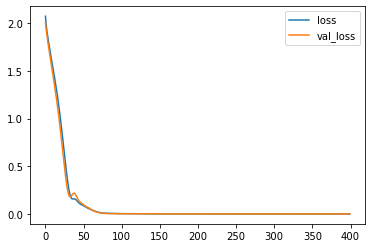

In [27]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [29]:
X_test

array([[9.68697830e-01, 9.47046843e-01, 9.58436214e-01, 5.22202746e-02],
       [3.63939900e-01, 4.43177189e-01, 3.94238683e-01, 8.12153082e-02],
       [9.84140234e-01, 9.60081466e-01, 9.76954733e-01, 4.79842244e-02],
       [4.80383973e-01, 4.68431772e-01, 4.89711934e-01, 1.67981303e-02],
       [4.15275459e-01, 4.11812627e-01, 4.40740741e-01, 7.15746421e-03],
       [2.37896494e-01, 2.53767821e-01, 2.63374486e-01, 4.58661992e-02],
       [6.08514190e-01, 6.16293279e-01, 5.69547325e-01, 2.74320771e-01],
       [4.34891486e-01, 4.24032587e-01, 4.47736626e-01, 5.33158048e-03],
       [3.88146912e-02, 9.36863544e-02, 7.48971193e-02, 5.11977797e-02],
       [1.34808013e-01, 1.30346232e-01, 8.55967078e-02, 6.89453696e-02],
       [1.33973289e-01, 1.52342159e-01, 1.57613169e-01, 2.93602103e-02],
       [4.01085142e-01, 3.94297352e-01, 3.87654321e-01, 5.95968449e-02],
       [2.14524207e-01, 2.24847251e-01, 2.43621399e-01, 1.70172363e-02],
       [5.86811352e-01, 5.83706721e-01, 5.26337449e

In [30]:
predictions = model.predict(X_test)

In [31]:
mean_absolute_error(y_test,predictions)

0.004933854777654023

In [32]:
np.sqrt(mean_squared_error(y_test,predictions))

0.006697438950441381

In [33]:
explained_variance_score(y_test,predictions)

0.33698073308651577

In [36]:
df_market['close'].mean()

1.3995819500000002

In [37]:
df_market['close'].median()

1.398465

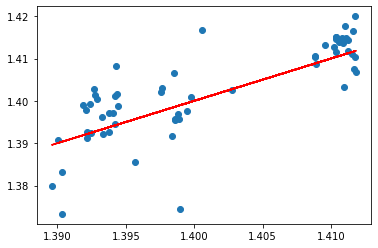

In [38]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [40]:
errors = y_test.values.reshape(60, 1) - predictions

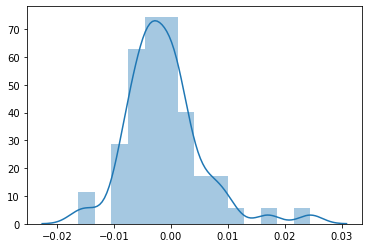

In [41]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [246]:
single_house = df.drop('price',axis=1).iloc[0]
new_market_data = mt5.copy_rates_from(Symbol_Trade,mt5.TIMEFRAME_M15,datetime.now(),10)
new_market_data= pd.DataFrame(new_market_data)
new_market_data = new_market_data.drop(['time','close','real_volume','spread'], axis = 1)
new_market_data

,open,high,low,tick_volume
0,1.39436,1.39525,1.39436,995
1,1.39444,1.39576,1.39411,750
2,1.39564,1.39584,1.39473,663
3,1.39512,1.39586,1.39471,891
4,1.39469,1.39622,1.39454,1133
5,1.39564,1.39574,1.39498,1058
6,1.39557,1.39615,1.39483,1665
7,1.39524,1.39524,1.39224,1190
8,1.39273,1.39323,1.39198,1331
9,1.39274,1.39407,1.39263,1028


In [247]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))
new_market_data = scaler.transform(new_market_data.values.reshape(-1,4))

ValueError: X has 19 features, but MinMaxScaler is expecting 4 features as input.

In [249]:
single_house
new_market_data

,open,high,low,tick_volume
0,1.39436,1.39525,1.39436,995
1,1.39444,1.39576,1.39411,750
2,1.39564,1.39584,1.39473,663
3,1.39512,1.39586,1.39471,891
4,1.39469,1.39622,1.39454,1133
5,1.39564,1.39574,1.39498,1058
6,1.39557,1.39615,1.39483,1665
7,1.39524,1.39524,1.39224,1190
8,1.39273,1.39323,1.39198,1331
9,1.39274,1.39407,1.39263,1028


In [252]:
#model.predict(single_house)
model_market.predict(new_market_data)

array([[381.70047],
       [287.91653],
       [254.61275],
       [341.8898 ],
       [434.52606],
       [405.81573],
       [638.1711 ],
       [456.3448 ],
       [510.319  ],
       [394.33325]], dtype=float32)

In [90]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64